In [14]:
import json
import matplotlib.pyplot as plt
import datetime, time
import pytz
import pandas as pd

In [55]:
hashtag = '#SuperBowl'
hashtag_dict = {'#GoHawks' : 'tweets_#gohawks.txt',
                '#GoPatriots' : 'tweets_#gopatriots.txt',
                '#NFL' : 'tweets_#nfl.txt',
                '#Patriots' : 'tweets_#patriots.txt',
                '#SB49' : 'tweets_#sb49.txt',
                '#SuperBowl' : 'tweets_#superbowl.txt'}

input_file = open('../tweet_data/' + hashtag_dict[hashtag])
pst_tz = pytz.timezone('US/Pacific')

total_list = []
for line in input_file:
    curr_list = []
    curr_data = json.loads(line)
    
    time = curr_data['citation_date']
    retweet = curr_data['metrics']['citations']['total']
    follower = curr_data['author']['followers']
    
    curr_list.append(time)
    curr_list.append(retweet)
    curr_list.append(follower)
    
    total_list.append(curr_list)



In [56]:
import numpy as np

print total_list[0:10][:]
Data = pd.DataFrame(total_list,columns=['time','retweet','follower'])
Data = Data.sort_values(by = 'time')
Data = Data.reset_index(drop=True)
print Data

    #print row['time']
    #print time

[[1421367835, 7, 199.0], [1421468497, 2, 22.0], [1421467579, 15, 22.0], [1421266957, 2, 858.0], [1421261298, 2, 14335.0], [1421255246, 10, 1374.0], [1421316031, 7, 1143.0], [1421361834, 34, 426.0], [1421486952, 2, 363.0], [1421496104, 3, 5869.0]]
               time  retweet   follower
0        1421223187        1       20.0
1        1421223224        1     1495.0
2        1421223711        1      258.0
3        1421224280        1      353.0
4        1421224701        1      142.0
5        1421224786        2      544.0
6        1421224793        1      142.0
7        1421225581        1      227.0
8        1421226807        1      755.0
9        1421227763        1     7605.0
10       1421228177        1      283.0
11       1421228188        2     3217.0
12       1421228808        2      413.0
13       1421229184        1      379.0
14       1421229512        2      379.0
15       1421229640       10  1362401.0
16       1421229873       10       49.0
17       1421230414        1     

In [62]:
def gethour(time_stamp):
    return (datetime.datetime.fromtimestamp(time_stamp, pst_tz)).hour

sum_tweet = 0
start_time = Data.iloc[0,0]
sum_number_retweet = 0
sum_number_follower = 0
max_number_follower = 0

feature_list = []
curr_list = []

for index, row in Data.iterrows():
    
    time = row['time']
    retweet = row['retweet']
    follower = row['follower']    
    hour = gethour(time)
    
    if hour == start_hour:
        sum_tweet += 1
        sum_number_retweet += retweet
        sum_number_follower += follower
        max_number_follower = max(max_number_follower,follower)
    else:
        curr_list.append(sum_tweet)
        curr_list.append(sum_number_retweet)
        curr_list.append(sum_number_follower)
        curr_list.append(max_number_follower)
        curr_list.append(start_hour)
        feature_list.append(curr_list)
        
        sum_tweet = 0
        start_hour = hour
        sum_number_retweet = retweet
        sum_number_follower = follower
        max_number_follower = follower
        curr_list = []

curr_list.append(sum_tweet)
curr_list.append(sum_number_retweet)
curr_list.append(sum_number_follower)
curr_list.append(max_number_follower)
curr_list.append(start_hour)
feature_list.append(curr_list)
    

In [97]:
FeatureData = pd.DataFrame(feature_list,columns=['number_tweets','sum_number_retweets',
                                                 'sum_number_followers','max_number_followers',
                                                 'Time'])
print FeatureData

      number_tweets  sum_number_retweets  sum_number_followers  \
0                0                  0.0                   0.0   
1                7                  9.0                3181.0   
2                6                 10.0               13031.0   
3               11                 75.0             1406539.0   
4               11                 14.0               26140.0   
5               13                 19.0               29638.0   
6               10                 21.0               39735.0   
7               20                 38.0               39514.0   
8               31                 59.0              226562.0   
9               60                119.0              822461.0   
10              57                 95.0              177967.0   
11              69                 96.0              582835.0   
12              56                 85.0              266742.0   
13              55                 84.0              178891.0   
14              62      

In [98]:
Target = FeatureData.iloc[1:,0]
print Target

FeatureData = FeatureData[:len(Target)]
print FeatureData

1        7
2        6
3       11
4       11
5       13
6       10
7       20
8       31
9       60
10      57
11      69
12      56
13      55
14      62
15      55
16      33
17      24
18      23
19      18
20      34
21      31
22      20
23      15
24      13
25      10
26      15
27       8
28      14
29      23
30      15
      ... 
558     85
559    267
560    341
561    359
562    333
563    329
564    331
565    441
566    329
567    295
568    232
569    247
570    580
571    227
572    218
573    223
574    210
575    121
576    134
577      3
578      1
579      0
580      0
581      0
582      0
583      1
584      2
585      1
586      3
587      0
Name: number_tweets, Length: 587, dtype: int64
     number_tweets  sum_number_retweets  sum_number_followers  \
0                0                  0.0                   0.0   
1                7                  9.0                3181.0   
2                6                 10.0               13031.0   
3               11    

In [99]:
from sklearn.linear_model import LinearRegression

Lin_reg = LinearRegression()
Lin_reg_result = Lin_reg.fit(FeatureData, Target)

Fitted values vs. Actual values:


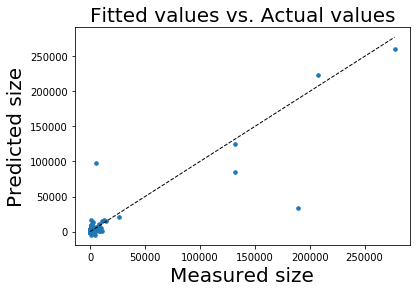

In [100]:
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_predict

predicted_target_data = Lin_reg_result.predict(FeatureData)
fig, ax = plt.subplots()
area = np.pi * (4)**2/4
ax.scatter(Target, predicted_target_data, s = area)
ax.plot([Target.min(), Target.max()], [Target.min(), Target.max()], 'k--', lw = 1)
ax.set_xlabel('Measured size', fontsize = 20)
ax.set_ylabel('Predicted size', fontsize = 20)
plt.title('Fitted values vs. Actual values', fontsize = 20)

print "Fitted values vs. Actual values:"
plt.show()

In [103]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

print 'R-squared', r2_score(Target, predicted_target_data)

 R-squared 0.8021908473338097


In [104]:
import statsmodels.api as sm

X = FeatureData.as_matrix()
y = Target.as_matrix()
lm = sm.OLS(y, X).fit()
print (lm.summary())
print list(FeatureData)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     481.5
Date:                Fri, 09 Mar 2018   Prob (F-statistic):          4.25e-204
Time:                        11:08:08   Log-Likelihood:                -6108.2
No. Observations:                 587   AIC:                         1.223e+04
Df Residuals:                     582   BIC:                         1.225e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.3014      0.079     28.987      0.0